In [1]:
class logReturn:
    def __init__(self):
        pass
    
    def fit(self, df, windows:int=0):
        self.df = copy.deepcopy(df)
        self.rdf = copy.deepcopy(df)
        self.windows = windows
        self.transformR()
        self.rollingWindow()

    def transformR(self):
        self.lr = np.log(self.df/self.df.shift(1))
        return self
    
    def backwardR(self, logR, pred:bool=False):
        if pred:
            ndf = copy.deepcopy(self.df)
            return np.exp(logR) * ndf[self.windows:].shift(1)
        else:
            return np.exp(logR) * self.df.shift(1)
    
    def rollingWindow(self):
        rolling = len(self.lr) - self.windows
        self.rollingX = np.array([self.lr[i: i+self.windows] for i in range(rolling)])
        self.rollingY = np.array([self.lr[i+self.windows] for i in range(rolling)])
        return self

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def plotter(matrix, fname, acc, f1):
    plt.style.use('fivethirtyeight')
    plt.rcParams["font.family"] = ["monospace"]

    plt.figure(figsize=(10, 10))

    sns.heatmap(matrix,
                cmap = 'Reds',
                square = True, 
                annot=True, fmt='.0f',
                norm=colors.LogNorm(),
                annot_kws={"fontsize":20, "fontweight":"bold"},
                cbar=False)
    plt.ylabel('True', fontweight="bold")
    plt.xlabel('Pred', fontweight="bold")
    plt.title(f"{fname}\n", fontsize=30, fontweight="bold")
    plt.text(1,-0.05,f'Accuracy: {round(acc, 4)} F1-Score:{round(f1, 4)}', ha='center', fontsize=20, fontweight="bold")
    plt.savefig(f'./Images/C_{fname}.png', bbox_inches='tight')

In [3]:
import pandas as pd
import numpy as np
import talib
import copy
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

df = pd.read_csv('./Data/CleanBTCUSDT_1M.csv')

In [4]:
df

,timestamp,open,high,low,close,volume
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796
...,...,...,...,...,...,...
2279877,2021-12-23 07:18:00,48399.24,48407.98,48384.86,48390.19,16.975530
2279878,2021-12-23 07:19:00,48390.20,48417.98,48390.19,48417.98,9.188340
2279879,2021-12-23 07:20:00,48417.97,48439.82,48406.19,48430.60,7.366720
2279880,2021-12-23 07:21:00,48430.61,48442.00,48419.95,48425.96,6.630590


In [5]:
df = df[round(df.shape[0]/1.01):]
df.reset_index(drop=True, inplace=True)
df

,timestamp,open,high,low,close,volume
0,2021-12-07 15:10:00,51552.69,51588.39,51480.01,51484.89,20.00728
1,2021-12-07 15:11:00,51484.88,51581.04,51480.27,51558.35,27.38305
2,2021-12-07 15:12:00,51558.36,51580.37,51528.26,51541.52,22.40820
3,2021-12-07 15:13:00,51541.52,51620.83,51538.79,51601.93,20.65334
4,2021-12-07 15:14:00,51601.94,51610.99,51559.04,51568.85,18.50557
...,...,...,...,...,...,...
22568,2021-12-23 07:18:00,48399.24,48407.98,48384.86,48390.19,16.97553
22569,2021-12-23 07:19:00,48390.20,48417.98,48390.19,48417.98,9.18834
22570,2021-12-23 07:20:00,48417.97,48439.82,48406.19,48430.60,7.36672
22571,2021-12-23 07:21:00,48430.61,48442.00,48419.95,48425.96,6.63059


In [6]:
High = df["high"].shift(1).copy()
Low = df["low"].shift(1).copy()
Open = df["open"].shift(1).copy()
Close = df["close"].shift(1).copy()
Volume = df["volume"].shift(1).copy()

df["low-lag1"] = Low.copy()
df["high-lag1"] = High.copy()
df["open-lag1"] = Open.copy()
df["close-lag1"] = Close.copy()
df["volume-lag1"] = Volume.copy()

C:\Users\User\AppData\Local\Temp/ipykernel_13196/1655988929.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["low-lag1"] = Low.copy()
C:\Users\User\AppData\Local\Temp/ipykernel_13196/1655988929.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["high-lag1"] = High.copy()
C:\Users\User\AppData\Local\Temp/ipykernel_13196/1655988929.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [7]:
df.loc[:, ('MA10')]  = talib.MA(Close, timeperiod=10).copy()
df.loc[:, ('WMA10')] = talib.WMA(Close, timeperiod=10).copy()
df.loc[:, ('EMA10')] = talib.EMA(Close, timeperiod=10).copy()
df.loc[:, ('MOM')] = talib.MOM(Close, timeperiod=10).copy()
fastk, fastd = talib.STOCHF( High ,Low, Close, fastk_period=5, fastd_period=3, fastd_matype=0)
df.loc[:, ('K')] = fastk.copy()
df.loc[:, ('D')] = fastd.copy()
df.loc[:, ('RSI-5')]  = talib.RSI(Close,timeperiod=5).copy()
df.loc[:, ('RSI-10')] = talib.RSI(Close,timeperiod=10).copy()
df.loc[:, ('威廉指標R')] = talib.WILLR(High, Low, Close, timeperiod=10).copy() # 14 --> 10
df.loc[:, ('AD')] = talib.AD(High, Low, Close, Volume).values.copy()
df.loc[:, ('CCI指標')] = talib.CCI(High, Low, Close, timeperiod=10).copy()

C:\Anaconda3\envs\torchvenv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [8]:
LR = logReturn()
LR.fit(df.close)
df.loc[:, ('r')] = LR.lr.copy()

In [9]:
tp = np.where((df['r'] >= 0) , 1, 0)
df.loc[:, ('flag')] = tp.copy()

In [10]:
windows = 10
x, _ = LR.rollingX, LR.rollingY
y = df['flag'][:].values

In [11]:
df.iloc[:, 6:-2]

,low-lag1,high-lag1,open-lag1,close-lag1,volume-lag1,MA10,WMA10,EMA10,MOM,K,D,RSI-5,RSI-10,威廉指標R,AD,CCI指標
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51480.01,51588.39,51552.69,51484.89,20.00728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.205554,NaN
2,51480.27,51581.04,51484.88,51558.35,27.38305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.153980,NaN
3,51528.26,51580.37,51558.36,51541.52,22.40820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.158122,NaN
4,51538.79,51620.83,51541.52,51601.93,20.65334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.020826,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22568,48399.23,48408.02,48402.24,48399.23,4.84094,48440.982,48426.396910,48429.330075,-91.30,23.005763,19.469406,18.906397,38.177511,-86.905481,-612.721817,-110.098288
22569,48384.86,48407.98,48399.24,48390.19,16.97553,48431.087,48417.162000,48422.213698,-98.95,9.296330,17.589296,15.785362,35.761051,-94.267278,-621.870395,-103.571435
22570,48390.19,48417.98,48390.20,48417.98,9.18834,48427.207,48414.778910,48421.443935,-38.80,64.955956,32.419349,48.471678,47.180471,-68.278313,-612.682055,-52.329111
22571,48406.19,48439.82,48417.97,48430.60,7.36672,48423.552,48415.395819,48423.108674,-36.55,83.464849,52.572378,57.774839,51.528205,-56.476199,-609.354654,4.679249


In [12]:
x_more = df.iloc[:, 6:-2].values

In [13]:
x_more_F = np.append(x, x_more, axis=1)
# x_more_F = x_talib
# x_more_F = x

In [14]:
np.nan_to_num(x_more_F, 0)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.14800100e+04,  5.15883900e+04,  5.15526900e+04, ...,
         0.00000000e+00, -1.82055541e+01,  0.00000000e+00],
       [ 5.14802700e+04,  5.15810400e+04,  5.14848800e+04, ...,
         0.00000000e+00, -3.15397983e+00,  0.00000000e+00],
       ...,
       [ 4.83901900e+04,  4.84179800e+04,  4.83902000e+04, ...,
        -6.82783129e+01, -6.12682055e+02, -5.23291109e+01],
       [ 4.84061900e+04,  4.84398200e+04,  4.84179700e+04, ...,
        -5.64761994e+01, -6.09354654e+02,  4.67924853e+00],
       [ 4.84199500e+04,  4.84420000e+04,  4.84306100e+04, ...,
        -5.28577858e+01, -6.12370746e+02,  3.58919532e+01]])

In [15]:
pct = 0.7
TrainSize = round(y.shape[0]*pct)
TestSize = y.shape[0] - TrainSize

(TrainSize, TestSize)

(15801, 6772)

In [16]:
X_train, y_train = x_more_F[:TrainSize], y[:TrainSize]
X_test, y_test = x_more_F[TrainSize:], y[TrainSize:]

In [17]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
ms.fit(X_train)
X_train_ms = ms.transform(X_train)
X_test_ms = ms.transform(X_test)

# **Trian**

## **RandomForest**

In [18]:
from sklearn.ensemble import RandomForestClassifier

CF = RandomForestClassifier(n_estimators=100, 
                            criterion='gini',
                            max_depth=None,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0,
                            max_features='auto',
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            bootstrap=True,
                            oob_score=False,
                            n_jobs=None,
                            random_state=0,
                            verbose=0,
                            warm_start=False,
                            class_weight=None,
                            ccp_alpha=0.0,
                            max_samples=None,)
CF.fit(X_train_ms, y_train)

RandomForestClassifier(random_state=0)

In [21]:
CF_pred = CF.predict(X_test_ms)
CF_Accuracy = accuracy_score(y_test, CF_pred)
CF_F1 = f1_score(y_test, CF_pred)
CF_matrix = confusion_matrix(y_test, CF_pred)
print(f'Accuracy: {CF_Accuracy}\nF1 Score: {CF_F1}')

Accuracy: 0.5119610159480212
F1 Score: 0.4988627748294162


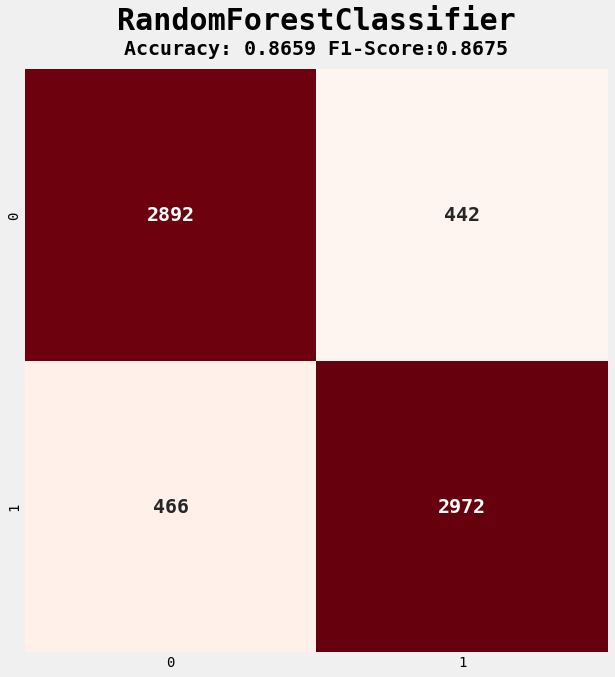

In [114]:
plotter(matrix=CF_matrix, fname='RandomForestClassifier', acc=CF_Accuracy, f1=CF_F1)

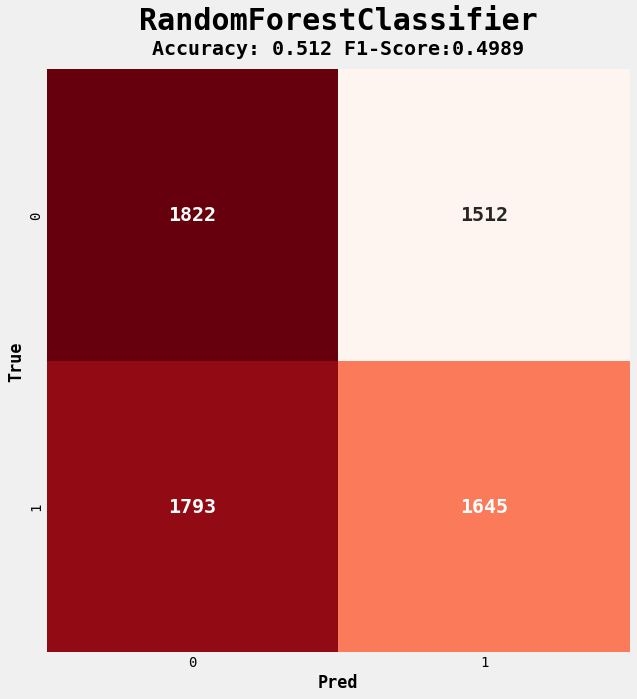

In [42]:
plotter(matrix=CF_matrix, fname='RandomForestClassifier', acc=CF_Accuracy, f1=CF_F1)

## **tree**

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train_ms, y_train)

DecisionTreeClassifier()

In [24]:
DTC_pred = DTC.predict(X_test_ms)
DTC_Accuracy = accuracy_score(y_test, DTC_pred)
DTC_F1 = f1_score(y_test, DTC_pred)
DTC_matrix = confusion_matrix(y_test, DTC_pred)
print(f'Accuracy: {DTC_Accuracy}\nF1 Score: {DTC_F1}')

Accuracy: 0.5069403425871235
F1 Score: 0.4915486523526725


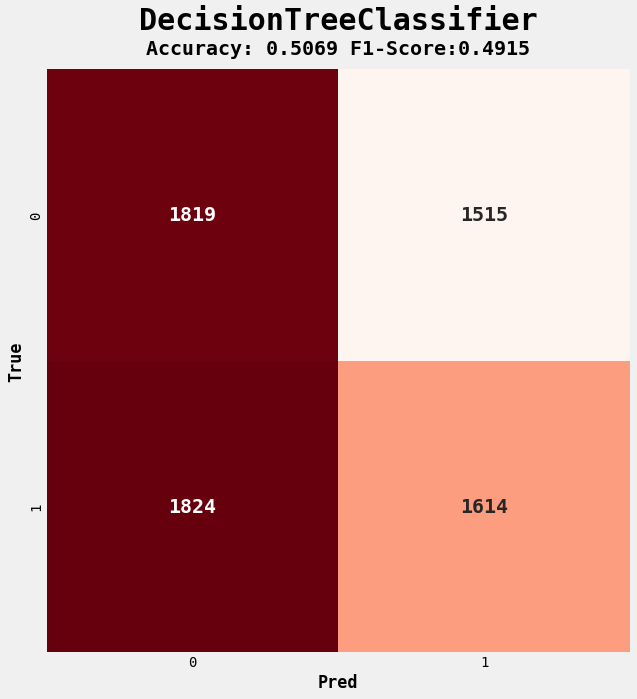

In [43]:
plotter(matrix=DTC_matrix, fname='DecisionTreeClassifier', acc=DTC_Accuracy, f1=DTC_F1)

## **XGboost**

In [26]:
from xgboost import XGBClassifier

XGBC = XGBClassifier(n_estimators=100, learning_rate= 0.01)
XGBC.fit(X_train_ms, y_train)

C:\Anaconda3\envs\torchvenv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:01:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
XGBC_pred = XGBC.predict(X_test_ms)
XGBC_Accuracy = accuracy_score(y_test, XGBC_pred)
XGBC_F1 = f1_score(y_test, XGBC_pred)
XGBC_matrix = confusion_matrix(y_test, XGBC_pred)
print(f'Accuracy: {XGBC_Accuracy}\nF1 Score: {XGBC_F1}')

Accuracy: 0.5082693443591259
F1 Score: 0.5211389128559103


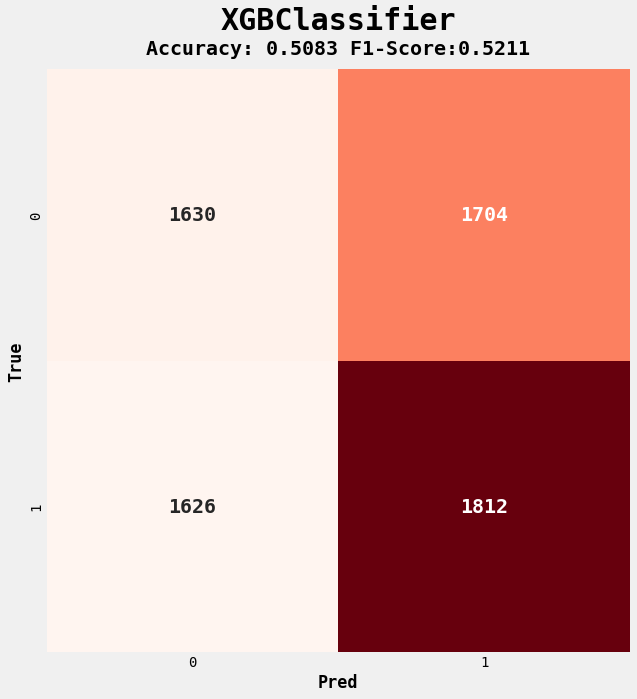

In [44]:
plotter(matrix=XGBC_matrix, fname='XGBClassifier', acc=XGBC_Accuracy, f1=XGBC_F1)

## **LightGBM**

In [29]:
# !pip install lightgbm

In [30]:
from lightgbm import LGBMClassifier

LGBM = LGBMClassifier()
LGBM.fit(X_train_ms, y_train)

LGBMClassifier()

In [31]:
LGBM_pred = LGBM.predict(X_test)
LGBM_Accuracy = accuracy_score(y_test, LGBM_pred)
LGBM_F1 = f1_score(y_test, LGBM_pred)
LGBM_matrix = confusion_matrix(y_test, LGBM_pred)
print(f'Accuracy: {LGBM_Accuracy}\nF1 Score: {LGBM_F1}')

Accuracy: 0.4909923213230951
F1 Score: 0.44874460259075644


In [32]:
LGBM_matrix

array([[1922, 1412],
       [2035, 1403]], dtype=int64)

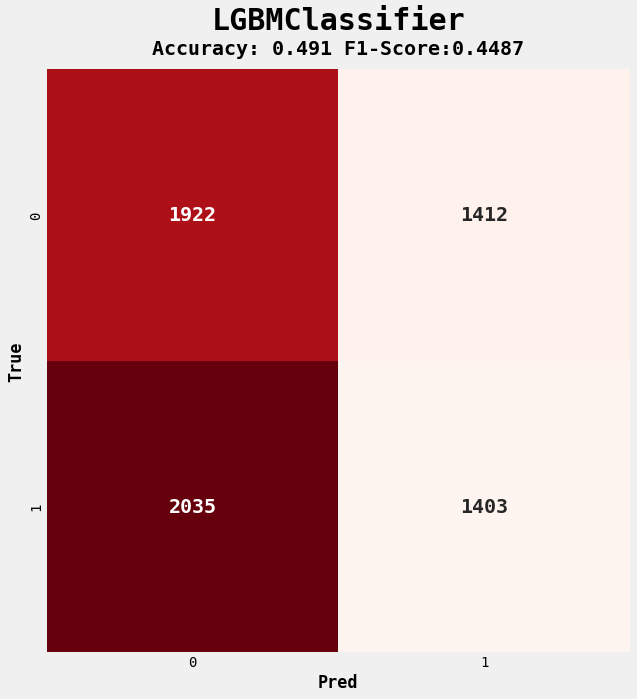

In [45]:
plotter(matrix=LGBM_matrix, fname='LGBMClassifier', acc=LGBM_Accuracy, f1=LGBM_F1)